<a href="https://colab.research.google.com/github/gbagolin/ttr-project/blob/master/binary_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O faces.zip "https://www.dropbox.com/s/t164dl4ulgcz5mq/faces.zip?dl=0"

In [0]:
!unzip faces.zip

In [36]:
from sklearn.svm import SVC
from upload_dataset import upload_dataset
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from upload_dataset import upload_dataset
import numpy as np
import cv2


#Parameters initialization
NUM_CLASSES = 2

# Dataset initialization
dataset = [] 
labels = []
features = []
class_list = [0,6]
# [(0,1) , (1,2) , (2,3) , (3,4) , (4,5) , (5,6)]
for i in class_list: 

  print("Upload class number: ", i)
  tmp_dataset, tmp_labels = upload_dataset('faces/{0}/'.format(i), i // max(class_list))
  labels.append(tmp_labels)

  for img in tmp_dataset: 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features.append(gray.reshape((40000)))

Upload class number:  0
Upload class number:  6


In [37]:
X = np.array(features)
print("N Row = N Elements: {}, N Col = N Features: {}".format(X.shape[0], X.shape[1]))

N Row = N Elements: 1948, N Col = N Features: 40000


In [0]:
#Labels Declaration 
y = [] 
for label_list in labels:
  for element in label_list: 
    y.append(element)

In [43]:
from sklearn.model_selection import train_test_split
random_state = 0
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, stratify=y,
                     random_state=random_state)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("N Elements train: ", X_train.shape[0])
print("N Elements test: ", X_test.shape[0])

N Elements train:  1753
N Elements test:  195


Classifier accuracy: 89.23%
Classifier precision wrt First Class: 0.89
Classifier precision wrt Second Class: 0.90
Classifier recall wrt First Class: 0.90
Classifier recall wrt Second Class: 0.89


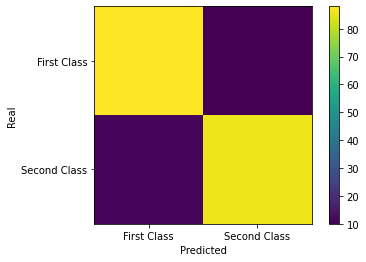

In [44]:
#Model, kernel and iteration declaration
models = []
kernel = 'rbf'
max_iteration = 10000

model = SVC(kernel=kernel, max_iter=max_iteration) 

#Model training with training set
model.fit(X_train, y_train)

#Testing set classification
predicted = model.predict(X_test)

cmc = np.zeros((NUM_CLASSES,NUM_CLASSES))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

#Results analysis
plt.imshow(cmc)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["First Class","Second Class"])
plt.yticks([0,1], ["First Class","Second Class"])
plt.ylabel("Real")

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision_0 = cmc[0,0] / np.sum(cmc[:,0])
precision_1 = cmc[1,1]/ np.sum(cmc[:,1])

recall_0 = cmc[0,0]/ np.sum(cmc[0,:])
recall_1 = cmc[1,1]/ np.sum(cmc[1,:])

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision wrt First Class: ' + "{0:.2f}".format(precision_0))
print('Classifier precision wrt Second Class: ' + "{0:.2f}".format(precision_1))
print('Classifier recall wrt First Class: ' + "{0:.2f}".format(recall_0))
print('Classifier recall wrt Second Class: ' + "{0:.2f}".format(recall_1))

plt.show()